<h1><center>Data Generation - Time Series</center></h1>

# Table of Contents 

- [Generate data](#generate_data)
    - [Horizontal](#horizontal)
    - [Single Spike Up](#single_spike_up)
    - [Single Spike Down](#single_spike_down)
    - [Hill](#hill)
    - [Dip](#dip)
    - [Chainsaw](#chainsaw)
    - [Upward Trend](#upward_trend)
    - [Downward Trend](#downward_trend)
    - [Cliff Up](#cliff_up)
    - [Cliff Down](#cliff_down)
    - [Several Spikes Up](#several_spikes_up)
    - [Several Spikes Down](#several_spikes_down)
    
- [Plots](#plotting)

**TODO:**
- Change m, r and x values to realistic ones. (~50)
- Normalize!

In [250]:
from random import randint, uniform
import numpy as np
import matplotlib.pylab as plt

TIMESTAMPS = int(input("How long are your time series (# of days)?"))
N_SAMPLES = int(input("Give the number of samples to generate for each category"))

How long are your time series (# of days)? 30
Give the number of samples to generate for each category 5000


In [678]:
t0 = 0
t_max = TIMESTAMPS - 1

def horizontal_shape(m=randint(0,10000), r=randint(0,500)): 
    """Generates a horizontal shape"""
    
    r_modulated = r*uniform(-1, 1)
    return max(0, m + r_modulated)

def single_spike_up(t, d, m=randint(0, 10000), r=randint(0,500), x=randint(0, 5000), t3 = randint(t0 + 1, t_max - 2)):
    """Generates shape containing a single spike up"""
    x_modulated = x*uniform(0, 1)
    r_modulated = r*uniform(-1,1)
        
    k = 0
    if(t <= t3+d and t >= t3):
        k = 1
    
    return max(0, m + r_modulated + k*x_modulated)  

def single_spike_down(t, d, m=randint(5000, 10000), r=randint(0,500), x=randint(0, 5000), t3 = randint(t0 + 1, t_max - 2)):  
    """Generates shape containing a single spike down"""
    
    x_modulated = x*uniform(0, -1)
    r_modulated = r*uniform(-1,1)
    
    k = 0
    if(t <= t3+d and t >= t3):
        k = 1
    
    return max(0, m + r_modulated + k*x_modulated) 

def hill(t, d, m=randint(0, 10000), r=randint(0,500), x=randint(0, 5000), t3 = randint(t0 + 1, t_max - 2)):   
    """Generates a hill shape"""

    x_modulated = x*uniform(0, 1)
    r_modulated = r*uniform(-1,1)
    
    k = 0
    if(t <= t3+d and t >= t3):
        k = 1
    
    return max(0, m + r_modulated + k*x_modulated) 

def dip(t, d, m=randint(0, 10000), r=randint(0,500), x=randint(0, 5000), t3 = randint(t0 + 1, t_max - 2)):
    """Generates a hill shape"""
    
    x_modulated = x*uniform(0, -1)
    r_modulated = r*uniform(-1,1)
    
    k = 0
    if(t <= t3+d and t >= t3):
        k = 1
    
    return max(0, m + r_modulated + k*x_modulated) 

def chainsaw(m=randint(0,10000), r=randint(500,5000)): 
    """Generates a chainsaw shape"""
    
    r_modulated = r*uniform(-1, 1)
    return max(0, m + r_modulated)

def upward_trend(t, m=randint(0, 10000), r=randint(0,500)):    
    """Generates an upward trend shape"""
    
    g_modulated = uniform(250, 500)
    r_modulated = r*uniform(-1, 1)
    return max(0, m + r_modulated + t*g_modulated)
 
def cliff_up(t, d, m=randint(0, 10000), r=randint(0,500), x=randint(0, 5000), t3 = randint(t0 + 5, t_max)):  
    """Generates a cliff up shape"""
    
    r_modulated = r*uniform(-1,1)
    
    k = 0
    if(t <= t3+d and t >= t3):
        k = 1
    
    return max(0, m + r_modulated + k*x)       

def several_spike_up(t, k, m=randint(0, 10000), r=randint(0,500), x=randint(0, 5000)):   
    """Generates a shape with several spikes up"""
    
    x_modulated = x*uniform(0, 1)
    r_modulated = r*uniform(-1,1)
            
    return max(0, m + r_modulated + k*x_modulated)  

def several_spike_down(t, k, m=randint(0, 10000), r=randint(0,500), x=randint(0, 5000)):  
    """Generates a shape with several spikes down"""
    
    x_modulated = x*uniform(0, -1)
    r_modulated = r*uniform(-1,1)
            
    return max(0, m + r_modulated + k*x_modulated)  

In [593]:
def generate_ks(spikes, len_ts):
    """Randomly generate an array of 0s and 1s where 1s are spikes"""
    #Track nubmer of spikes left
    spikes_left = spikes
    
    #Initiliaze array of results
    ks = [0]*len_ts
    
    #Keep looping until we insert spikes
    while(spikes_left > 0):
        for _ in range(spikes_left):
            #Randomly pick size of peak
            len_spike = randint(1,2)
            
            #Randomly pick where the peak starts
            idx = randint(0, len_ts - len_spike - 1)
            
            #Check whether insertion is possible at that index
            flag = check_valid(ks, idx, len_spike, len_ts)
            
            if(flag):
                #Insert 1s for peak
                for i in range(idx, idx+len_spike):
                    ks[i] = 1
                #Decrement number of spikes left    
                spikes_left -= 1
    return ks

def check_valid(ks, idx, len_spike, len_ts):
    """Checks if insertion in array of 0s and 1s is possible at index"""
    
    #Case where a peak is already there
    if(ks[idx] == 1 or ks[idx+len_spike] == 1):
        return False
    #Case where we are in the "middle" of the array
    if(idx-1 >0 and idx+len_spike<len_ts):
        flag = ks[idx-1] == 0 and ks[idx+len_spike] == 0
        
    #Case where we are limited from the right side    
    elif(idx-1 > 0 and idx+len_spike>len_ts):
        flag = ks[idx-1] == 0
        
    #Case where we are limited from the left side    
    elif(idx+len_spike < len_ts):
        flag = ks[idx+len_spike] == 0
    else:
        flag = 1
    
    #Print for history
    #print(flag, idx, len_spike)
    return bool(flag)

# Data Generation

<a id="horizontal"></a>

## Horizontal 

In [156]:
horizontals = []
time = np.arange(TIMESTAMPS)

for _ in range(N_SAMPLES):
    m_random, r_random = randint(0,10000), randint(0,500)
    y_horizontal = np.array([horizontal_shape(m=m_random, r=r_random) for x in time])
    horizontals.append(y_horizontal)
print('Generated', N_SAMPLES, 'Horizontal samples!')

Generated 500 Horizontal samples!


<a id="single_spike_up"></a>

## Single Spike Up

In [204]:
single_spike_ups = []
time = np.arange(TIMESTAMPS)

for i in range(N_SAMPLES):
    m_random, r_random, x_random, t3 = randint(0,10000), randint(0,500), randint(4000, 5000), randint(t0 + 1, t_max - 2)
    d_ssu = randint(1, 3)
    y_ssu = np.array([single_spike_up(t=x, m=m_random, r=r_random, x=x_random, t3=t3, d=d_ssu) for x in time])
    single_spike_ups.append(y_ssu)
print('Generated', N_SAMPLES, 'Single Spike Up samples!')

Generated 5000 Single Spike Up samples!


<a id="single_spike_down"></a>

## Single Spike Down

In [208]:
single_spike_downs = []
time = np.arange(TIMESTAMPS)

for i in range(N_SAMPLES):
    m_random, r_random, x_random, t3 = randint(0,10000), randint(0,500), randint(0, 5000), randint(t0 + 1, t_max - 2)
    d_ssd = randint(1, 3)
    y_ssd = np.array([single_spike_down(t=x, m=m_random, r=r_random, x=x_random, t3=t3, d=d_ssd) for x in time])
    single_spike_downs.append(y_ssd)
print('Generated', N_SAMPLES, 'Single Spike Down samples!')

Generated 5000 Single Spike Down samples!


<a id="hill"></a>

## Hill

In [668]:
hills = []
time = np.arange(TIMESTAMPS)

for i in range(N_SAMPLES):
    m_random, r_random, x_random, hill_start = randint(0,10000), randint(0,500), randint(0, 5000), randint(t0 + 1, t_max - 5)
    
    hill_end = randint(hill_start+4, t_max-1)
    
    d_hill = hill_end - hill_start
    
    y_hill = np.array([hill(t=x, m=m_random, r=r_random, x=x_random, t3=hill_start, d=d_hill) for x in time])
    hills.append(y_hill)
print('Generated', N_SAMPLES, 'Hill samples!')

Generated 5000 Hill samples!


<a id="dip"></a>

## Dip

In [287]:
dips = []
time = np.arange(TIMESTAMPS)

for i in range(N_SAMPLES):
    m_random, r_random, x_random, hill_start = randint(0,10000), randint(0,500), randint(0, 5000), randint(t0 + 1, t_max - 5)
    
    hill_end = randint(hill_start+4, t_max-1)
    
    d_dip = hill_end - hill_start
    
    y_dip = np.array([dip(t=x, m=m_random, r=r_random, x=x_random, t3=hill_start, d=d_dip) for x in time])
    dips.append(y_dip)
print('Generated', N_SAMPLES, 'Hill samples!')

Generated 5000 Hill samples!


<a id="chainsaw"></a>

## Chainsaw

In [225]:
chainsaws = []
time = np.arange(TIMESTAMPS)

for _ in range(N_SAMPLES):
    m_random, r_random = randint(0,10000), randint(500,5000)
    y_chainsaw = np.array([chainsaw(m=m_random, r=r_random) for x in time])
    chainsaws.append(y_chainsaw)
print('Generated', N_SAMPLES, 'Chainsaw samples!')

Generated 5000 Chainsaw samples!


<a id="upward_trend"></a>

## Upward Trend

In [270]:
upward_trends = []
time = np.arange(TIMESTAMPS)

for _ in range(N_SAMPLES):
    m_random, r_random = randint(0, 10000), randint(0,500)
    y_upward_trend = np.array([upward_trend(t=x, m=m_random, r=r_random) for x in time])
    upward_trends.append(y_upward_trend)
print('Generated', N_SAMPLES, 'Upward Trend samples!')

Generated 5000 Upward Trend samples!


<a id="downward_trend"></a>

## Downward Trend

In [277]:
downward_trends = []
time = np.arange(TIMESTAMPS)

for _ in range(N_SAMPLES):
    m_random, r_random = randint(0, 10000), randint(0,500)
    y_downward_trend = np.array([upward_trend(t=x, m=m_random, r=r_random) for x in time])
    downward_trends.append(y_downward_trend[::-1])
print('Generated', N_SAMPLES, 'Downward Trend samples!')

Generated 5000 Downward Trend samples!


<a id="cliff_up"></a>

## Cliff Up

In [679]:
cliff_ups = []
time = np.arange(TIMESTAMPS)

for i in range(N_SAMPLES):
    m_random, r_random, x_random, cliff_start = randint(0,10000), randint(0,500), randint(0, 5000), randint(t0 + 5, t_max)
    d_cu = t_max - cliff_start
    y_cu = np.array([cliff_up(t=x, m=m_random, r=r_random, x=x_random, t3=cliff_start, d=d_cu) for x in time])
    cliff_ups.append(y_cu)
print('Generated', N_SAMPLES, 'Cliff Up samples!')

Generated 5000 Cliff Up samples!


<a id="cliff_down"></a>

## Cliff Down

In [681]:
cliff_downs = []
time = np.arange(TIMESTAMPS)

for i in range(N_SAMPLES):
    m_random, r_random, x_random, cliff_start = randint(0,10000), randint(0,500), randint(0, 5000), randint(t0 + 5, t_max)
    #x_random = 10000
    d_cd = t_max - cliff_start
    y_cd = np.array([cliff_up(t=x, m=m_random, r=r_random, x=x_random, t3=cliff_start, d=d_cd) for x in time])
    cliff_downs.append(y_cd[::-1])
print('Generated', N_SAMPLES, 'Cliff Down samples!')

Generated 5000 Cliff Down samples!


<a id="several_spikes_up"></a>

## Several Spikes Up

In [651]:
several_spike_ups = []
time = np.arange(TIMESTAMPS)

for i in range(N_SAMPLES):
    m_random, r_random, x_random, ks = randint(0,10000), randint(0,500), randint(4000, 5000), generate_ks(randint(3,7), TIMESTAMPS)
    y_ssu = np.array([several_spike_up(t=x, k=k, m=m_random, r=r_random, x=x_random) for x,k in zip(time, ks)])
    several_spike_ups.append(y_ssu)
print('Generated', N_SAMPLES, 'Several Spike Up samples!')

Generated 5000 Several Spike Up samples!


<a id="several_spikes_down"></a>

## Several Spikes Down

In [635]:
several_spike_downs = []
time = np.arange(TIMESTAMPS)

for i in range(N_SAMPLES):
    m_random, r_random, x_random, ks = randint(0,10000), randint(0,500), randint(4000, 5000), generate_ks(3, TIMESTAMPS)
    y_ssd = np.array([several_spike_down(t=x, k=k, m=m_random, r=r_random, x=x_random) for x,k in zip(time, ks)])
    several_spike_downs.append(y_ssd)
print('Generated', N_SAMPLES, 'Several Spike Down samples!')

Generated 5000 Several Spike Down samples!


<a id="plotting"></a>
# Plots

In [299]:
def random_plot(pattern, nrows, ncols, y_max_lim, y_min_lim=-100):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharey=True, figsize=(20,10))
    for i in range(nrows):
        for j in range(ncols):
            ax[i, j].plot(pattern[randint(0, len(pattern)-1)])
            ax[i, j].grid(True)
            plt.ylim(y_min_lim,y_max_lim)
            ax[i, j].set_xlabel('Dates')
            ax[i, j].set_ylabel('CVs')

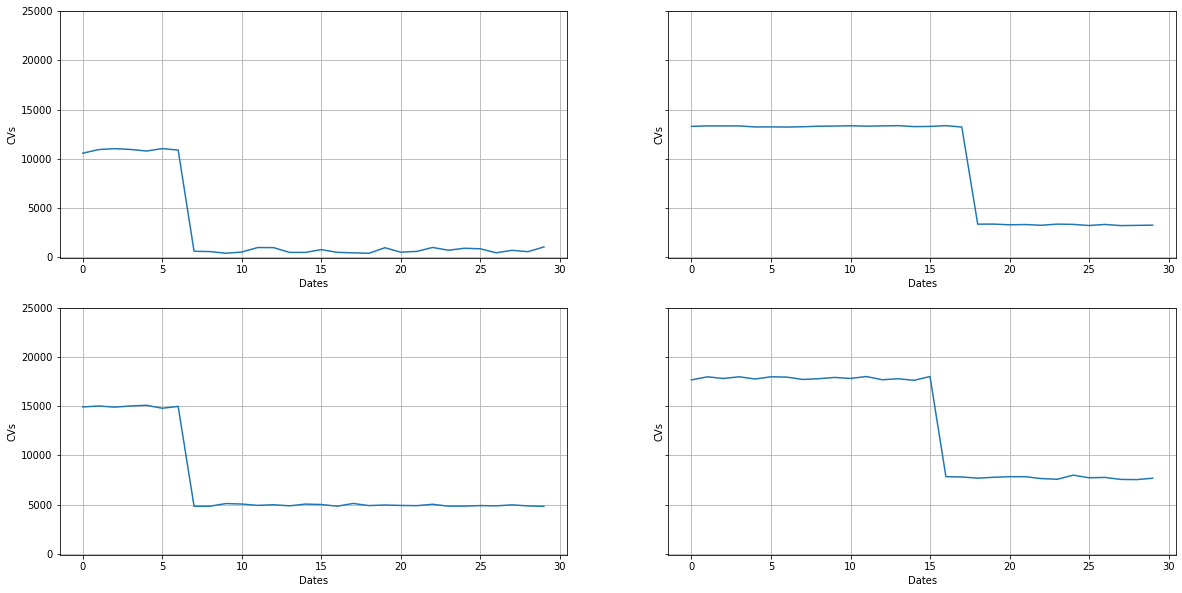

In [683]:
random_plot(cliff_downs, nrows=2, ncols=2, y_max_lim=25000)